# Using Predictive Analysis to Predict Diagnosis of a Breast Tumor

## Libraries
Getting started: Load libraries and set options.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

plt.rcParams['figure.figsize']=(17, 10)
plt.rcParams['axes.titlesize']='large'
plt.style.use('fivethirtyeight')
sns.set_style("white")

from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement
Breast cancer is the foremost malignancy affecting women, representing almost one-third of all cancers diagnosed in women in the United States. It stands as the second most frequent cause of cancer-related death among women. This type of cancer emerges from abnormal cell growth within breast tissue, typically forming a tumor. It's crucial to note that not all tumors are cancerous; they can be benign, pre-malignant, or malignant. Diagnosis often involves tests like MRI, mammogram, ultrasound, and biopsy.
### Expected Outcome
Given that breast cancer can be diagnosed through a breast fine-needle aspiration (FNA) test, which is a relatively quick and straightforward procedure involving the removal of fluid or cells from a breast lesion or cyst using a fine needle similar to one used for blood sampling. With this in mind, a model can be developed to classify breast cancer tumors using two training classifications:
- 1 = Malignant (Cancerous) - Present
- 0 = Benign (Not Cancerous) - Absent
### Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning, this is a classification problem.
> *Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.*
### Identify data sources
The [Breast Cancer](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) datasets is avaliable as ML repository maintained by the University of Californi, Irvine. The dataset contains 569 samples of malignant and bening tumor cells.
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M = malignant, B = benign), respectively.
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.
#### Load Dataset
First, load the supplied CSV file using additional options in the Pandas read_csv funtion.

In [2]:
df=pd.read_csv('data/data.csv', index_col=False)

##### Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:
+ The easiest being to request the first few records using the DataFrame `data.head()` method. By default, `data.head()` returns the first 5 rows from the DataFrame object df (excluding the header row).
+ Alternatively, one can also use `df.tail()` to return the five rows of the data frame.
+ For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Save the cleaner version of dataframe with "id" for future analysis
df.to_csv("data/data_clean_id.csv")

You can check the number of cases, as well as the number of fields, using the shape method, as hown below.

In [5]:
# Id column is redundant and not useful, I want to drop it
df.drop('id', axis=1, inplace=True)
#df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
df.shape

(569, 31)

In the result displayed, you can see the data has 569 records, each with 31 columns.<br><br>
The `info()` method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.<br><br>
The method `get_dtype_counts()` will return the number of columns of each type in a DataFrame:


In [7]:
# Review data types with "info()"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
# Check for missing variables
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign). The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

In [10]:
# Save the cleaner version fo dataframe for future analysis
df.to_csv("data/data_clean.csv")

> * __NOTE__: Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In following section, I will explore the data further. *

## Exploratory Data Analysis
Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.
### Objectives of Data Exploration
Exploratory data analysis (EDA) is a crucial stage occurring subsequent to feature engineering and data acquisition, preceding any modeling endeavors. This is imperative as it enables data scientists to comprehend the essence of the data without preemptive assumptions. The outcomes of data exploration offer invaluable insights into the data's structure, value distribution, and the existence of outliers and correlations within the dataset.
> *__The purpose of EDA is__:*

* to use summary statistics and visualizations to better understand data, *find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.**

Next step is to explore the data. There are two approached used to examine the data using:

1. __Descriptive statistics__ is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

2. __Visualization__ is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

### Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many [summary measurements](http://www.saedsayad.com/numerical_variables.htm).

In [11]:
# usind clean data with "id"
df=pd.read_csv('data/data_clean_id.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
# Basic descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df_values=df.drop(columns=['diagnosis'])
df_values.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

> *The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean` and `concave_points_mean` are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that `area_worst` and `perimeter_worst` are also quite useful.*

In [14]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
# Group by diagnosis and review the output
diag_gr=df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where: <br><br>
+ Malignant = 1 (indicates prescence of cancer cells)
+ Benign = 0 (indicates abscence)

__Observation__

> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

Lets confirm this, by ploting the histogram

### Unimodal Data Visualization
One of the main goals of visualizing the data here is to observe which features are most helpful in predicing malignant or bening cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.<br><br>
Apply 3 techniques that you can use to understand each attribute of your dataset independently.
- Histograms.
- Density Plots.
- Box and Whisker Plots.

<Axes: xlabel='diagnosis', ylabel='count'>

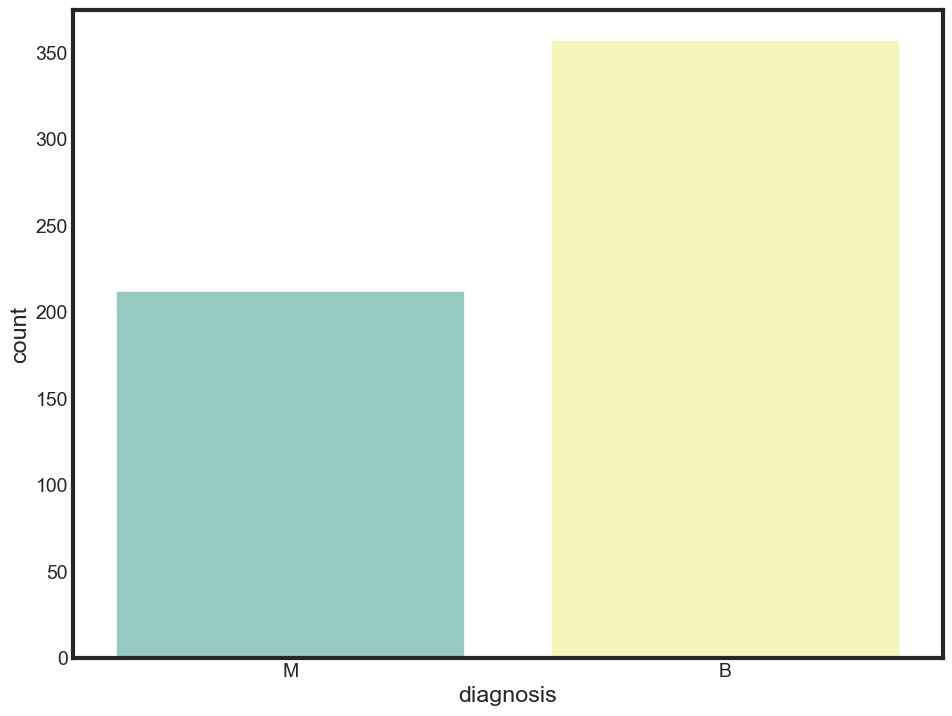

In [16]:
# Lets get the frequency of cancer diagnosis
sns.set_style('white')
sns.set_context({'figure.figsize':(10, 8)})
sns.countplot(x=df['diagnosis'], label='Count', palette='Set3')

#### Visualize distribution of data via histograms
Histograms are frequently employed for visualizing numerical data. They resemble bar graphs but are constructed after categorizing (binning) the values of the variable into a finite number of intervals (bins).<br><br>
By grouping data into these bins, histograms offer a count of observations within each bin. The shape of the bins provides insights into the distribution of the attribute, whether it follows a Gaussian, skewed, or exponential distribution. Additionally, histograms facilitate the identification of potential outliers.<br><br>
__Separte columns into smaller dataframes to perform visualization.__

In [17]:
# Break up columns into groups, according to their suffix designation 
# (_mean, _se,and __worst) to perform visualisation plots off. 
# Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:, ['id', 'diagnosis']]
df_diag=df.loc[:, ['diagnosis']]

# For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')


__Histogram the `_mean` suffix designition.__

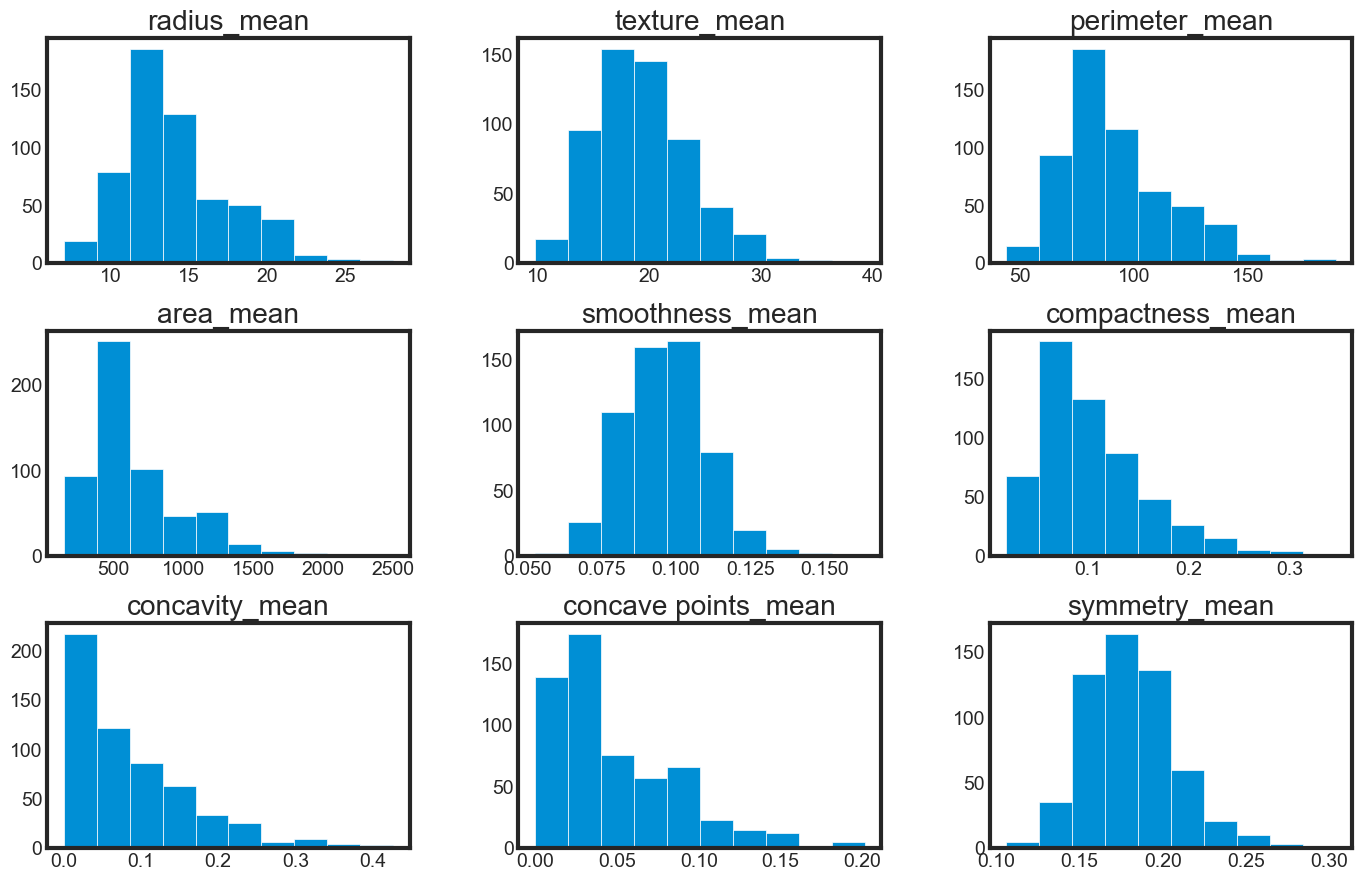

In [18]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10), grid=False)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

__Histogram for the `_se` suffix designition-__

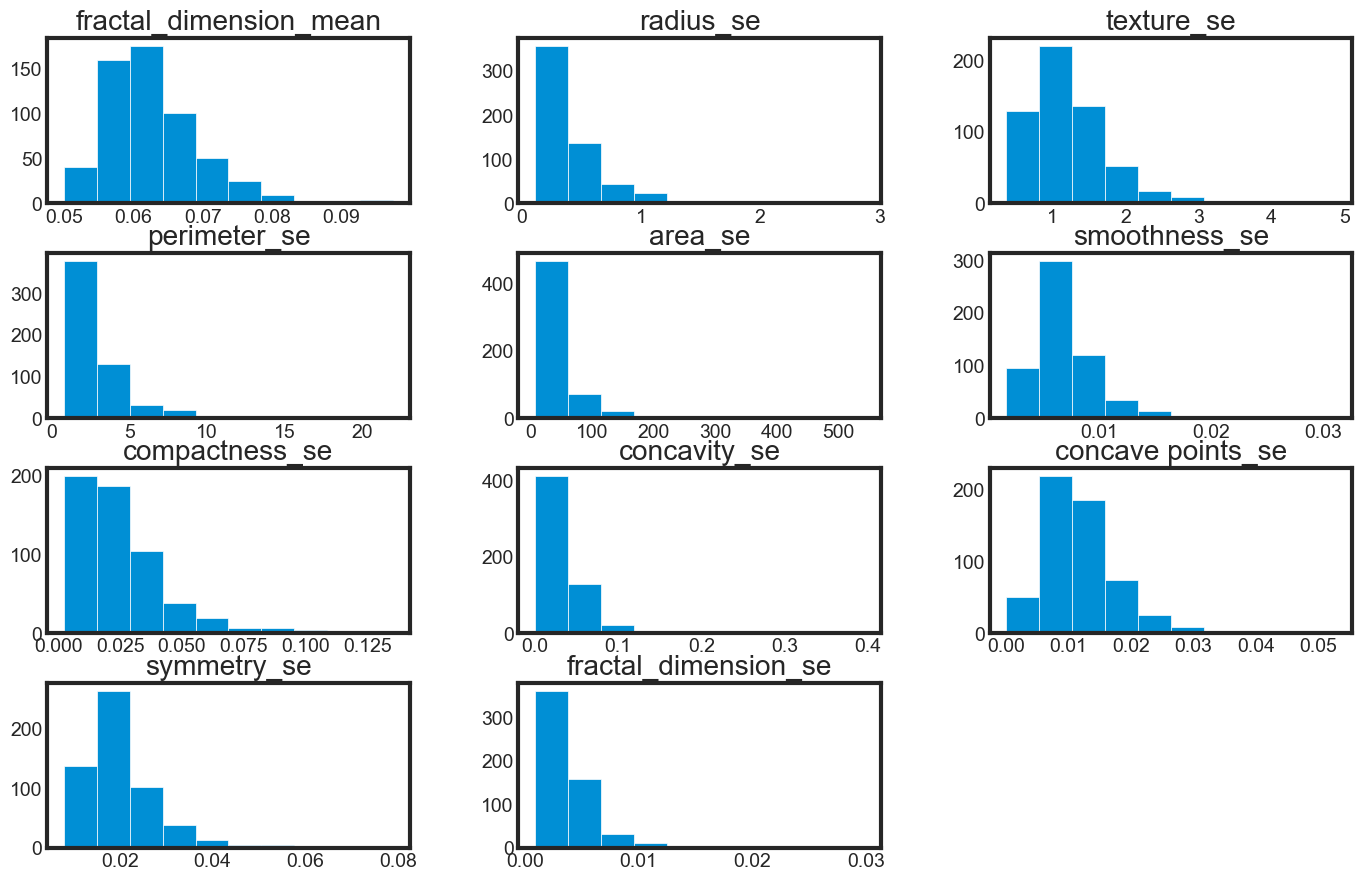

In [19]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

__Histogram `_worst` suffix designition.__

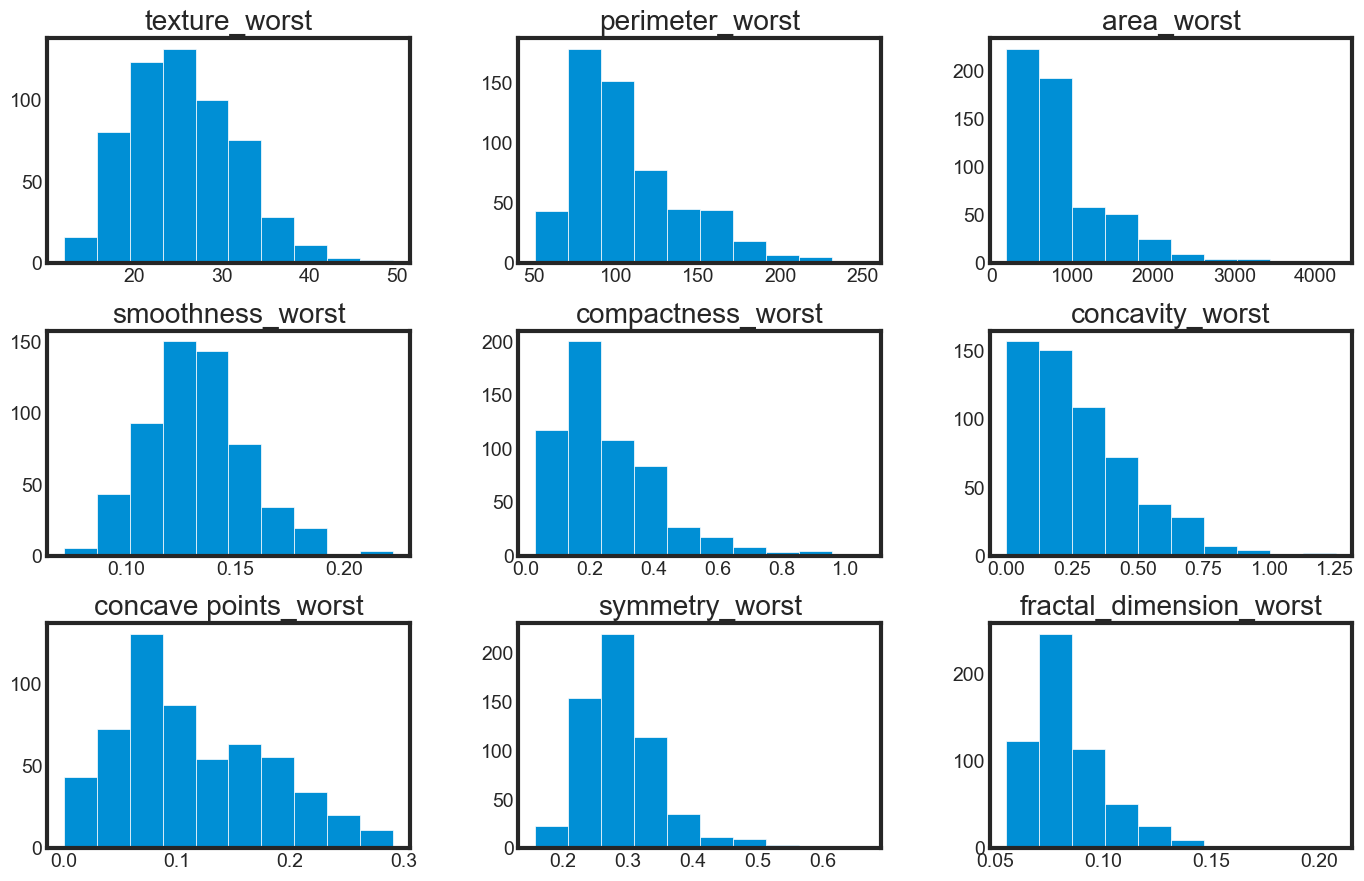

In [20]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

__Observation__
> *We can see that perhaps the attributes __concavity__, and **concavity_point** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.*
#### Visualize distribution of data via density plots
__Density plots `_mean` suffix designition.__

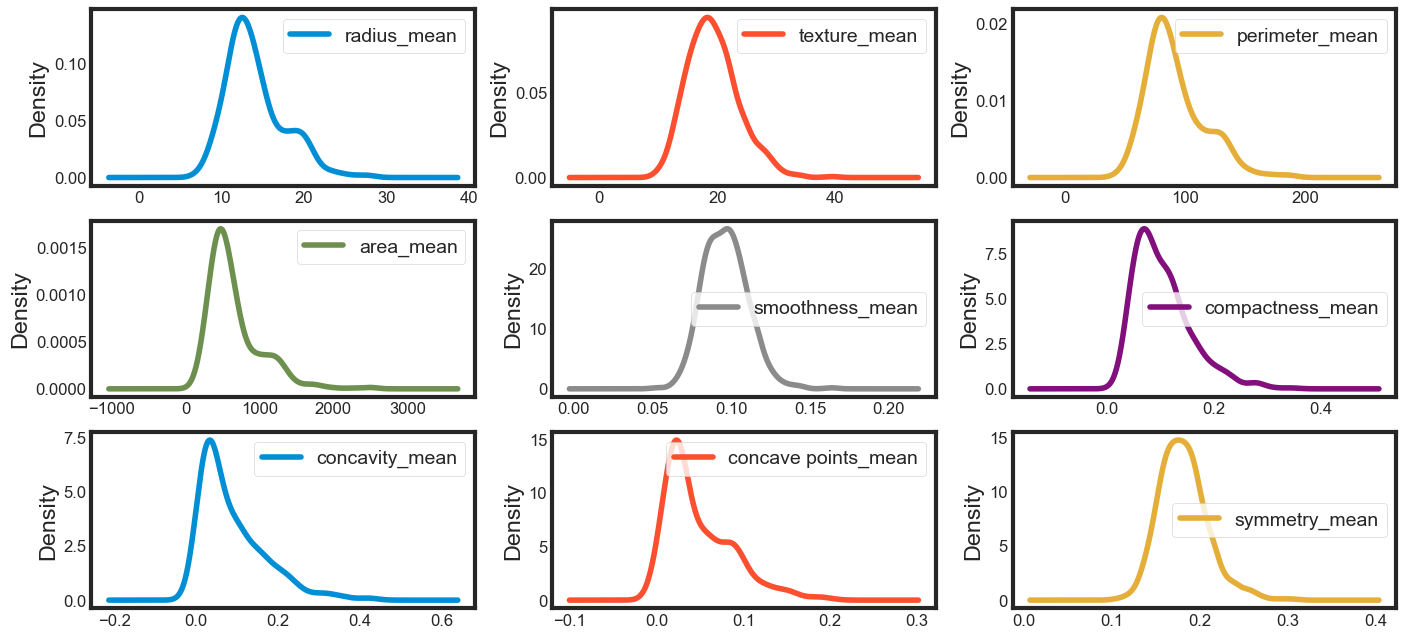

In [21]:
# Density plots
plt=df_mean.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))

__Density plots `_se` suffix designition.__

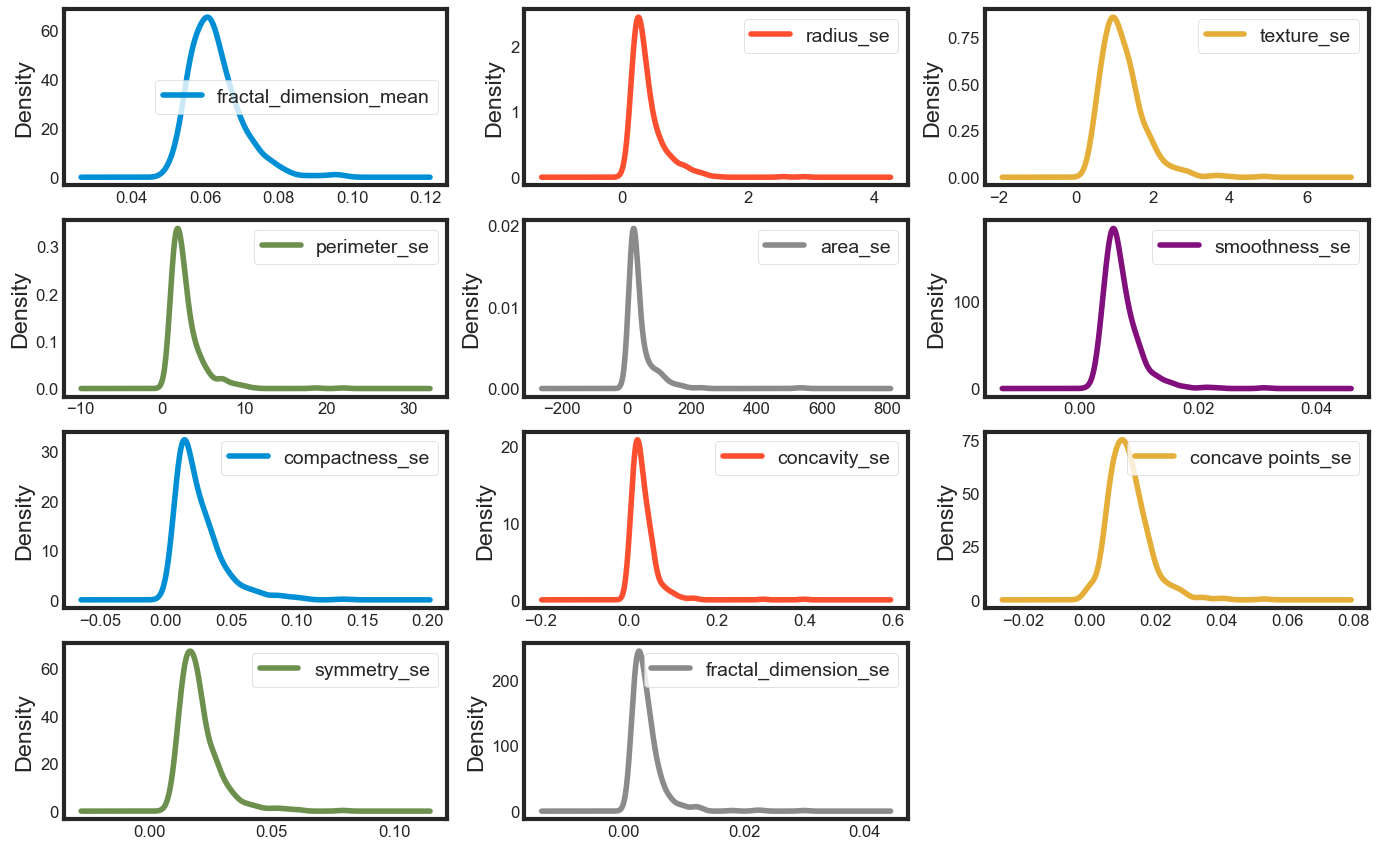

In [22]:
#Density Plots
plt=df_se.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

__Density plot `_worst` suffix designition.__

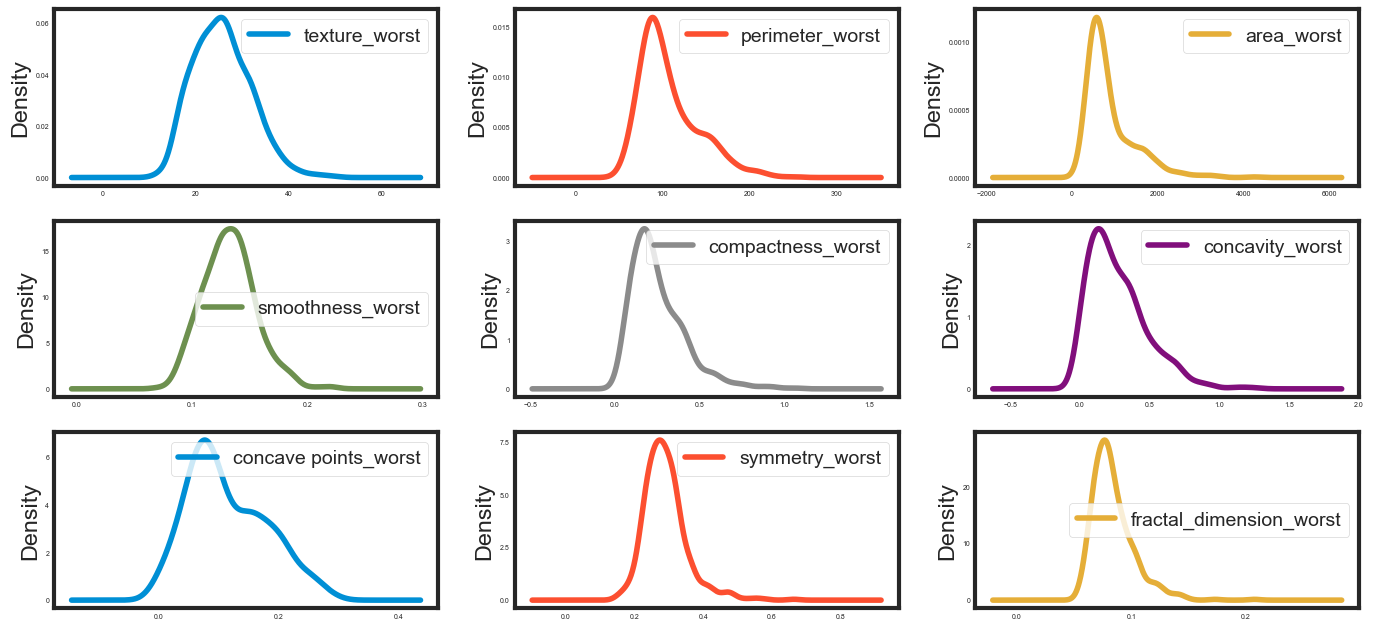

In [23]:
#Density Plots
plt=df_worst.plot(kind='kde', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=5, figsize=(15,10))

__Observation__
> *It appears that attributes such as perimeter, radius, area, concavity, and compactness possibly exhibit an exponential distribution. Conversely, attributes like texture, smoothness, and symmetry might demonstrate a Gaussian or nearly Gaussian distribution. This observation holds significance as numerous machine learning methods assume a Gaussian univariate distribution for the input variables.*
#### Visualize distribution of data via box plots
__Box plot `_mean` suffix designition.__

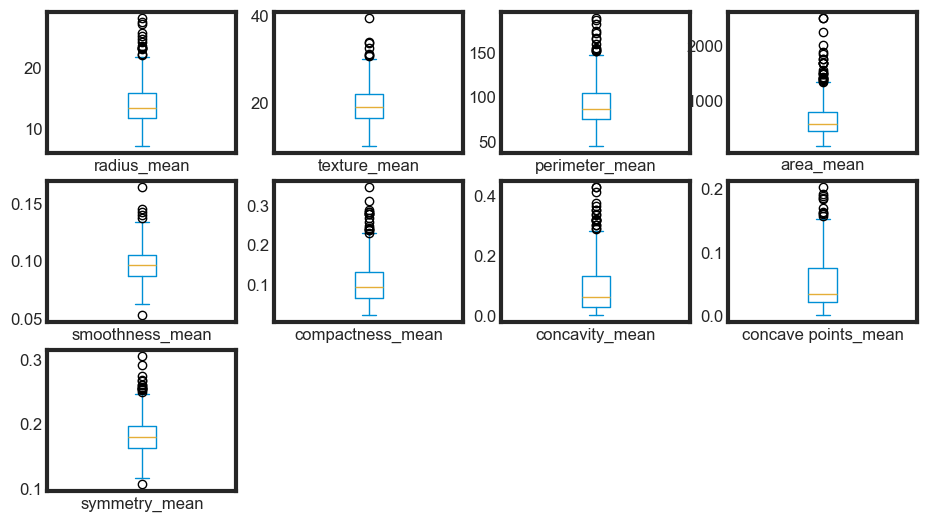

In [24]:
# Box and whisker plots
plt=df_mean.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, fontsize=12)

__Box plot `_se` suffix designition.__

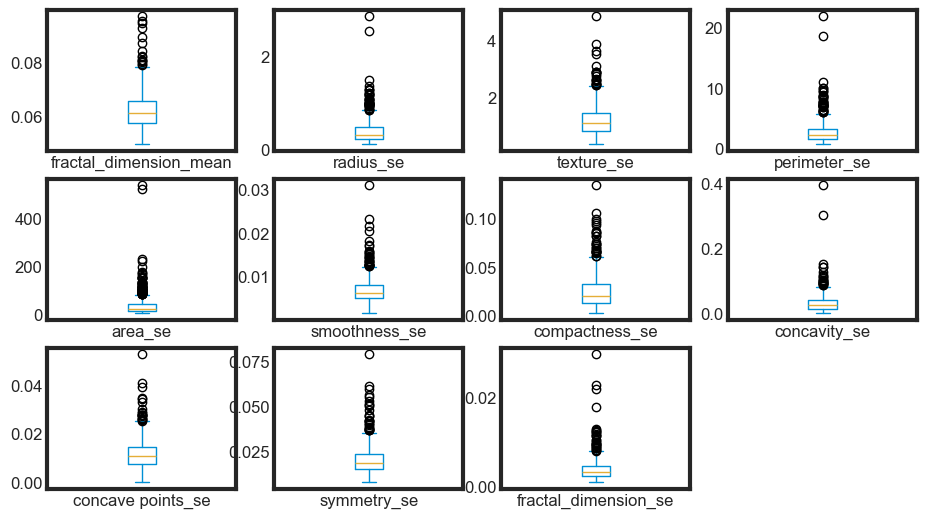

In [25]:
# box and whisker plots
plt=df_se.plot(kind='box' , subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12)

__Box plot `_worst` suffix designition.__

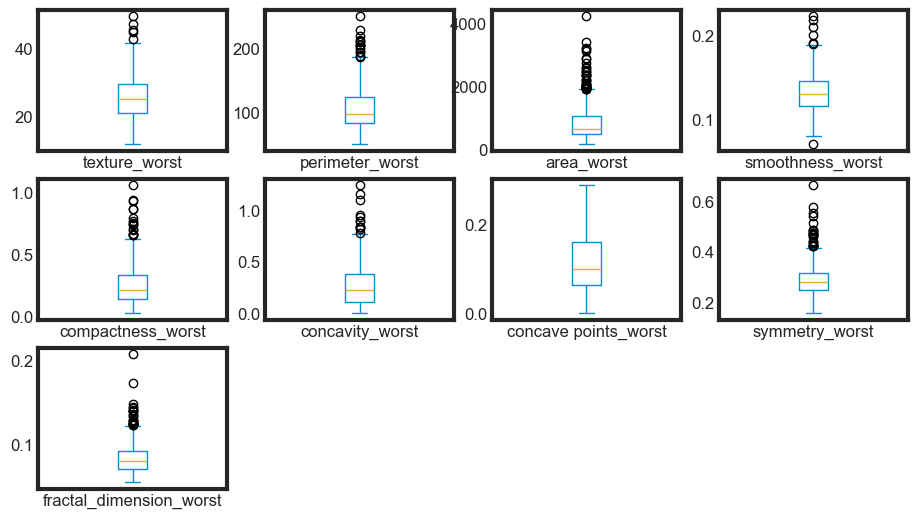

In [26]:
# box and whisker plots
plt=df_worst.plot(kind='box' , subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12)

__Observation__
> *It seems that attributes such as perimeter, radius, area, concavity, and compactness could potentially follow an exponential distribution. Conversely, attributes like texture, smoothness, and symmetry might exhibit a Gaussian or nearly Gaussian distribution. This observation is intriguing since numerous machine learning techniques rely on the assumption of a Gaussian univariate distribution for input variables.*
### Multimodal Data Visualizations
- Scatter plots
- Correlation matrix
#### Correlation matrix

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

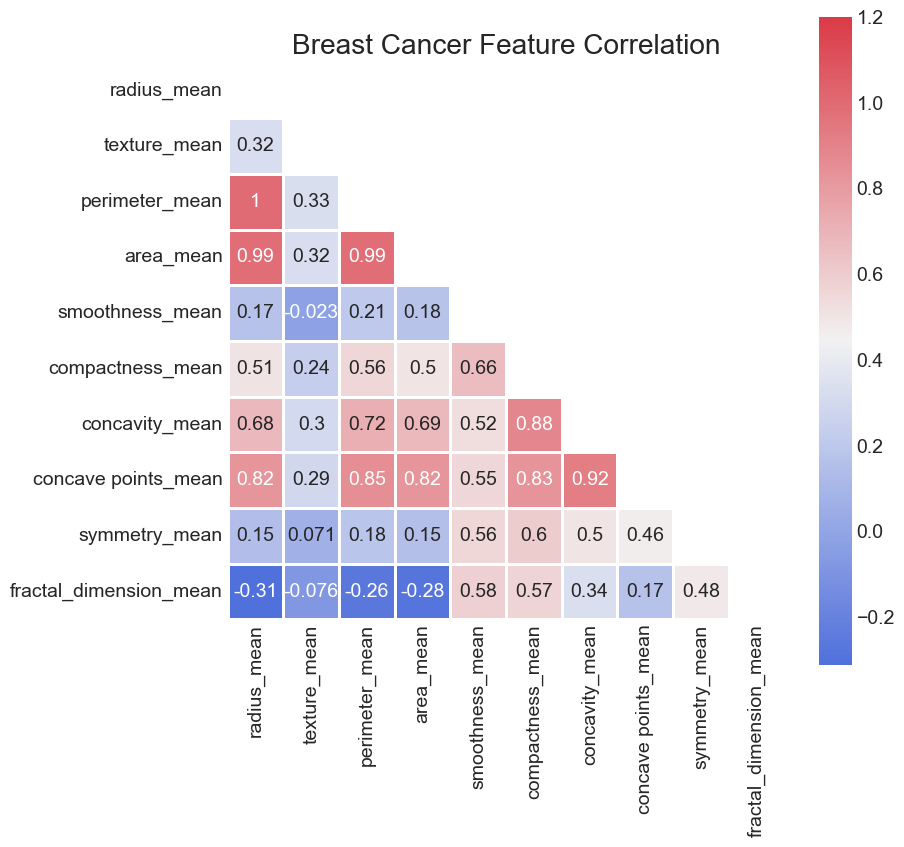

In [33]:
#plt.style.use('fivethirtyeight')
#sns.set_style('white')

df=pd.read_csv('data/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Compute the correlation matrix
df_mean=df.iloc[:,1:11]
corr=df_mean.corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
df, ax=plt.subplots(figsize=(8, 8))
plt.title("Breast Cancer Feature Correlation")

# Generate a custom diverging colormap
cmap=sns.diverging_palette(260, 10, as_cmap=True)

# Draw the hetamap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, ax=ax, annot=True,fmt='.2g', linewidths=2)

__Observation__:<br><br>
We can see strong positive relationship exists with mean values parameters between __1__ to __0.75__.
- The mean area of the tissue nucleus has a strong positive correlation with mean values of radious and parameter;
- Some parameters are modertely positive correlated (between 0.5 - 0.75) are concavity and area, concavity and perimeter, etc.
- Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

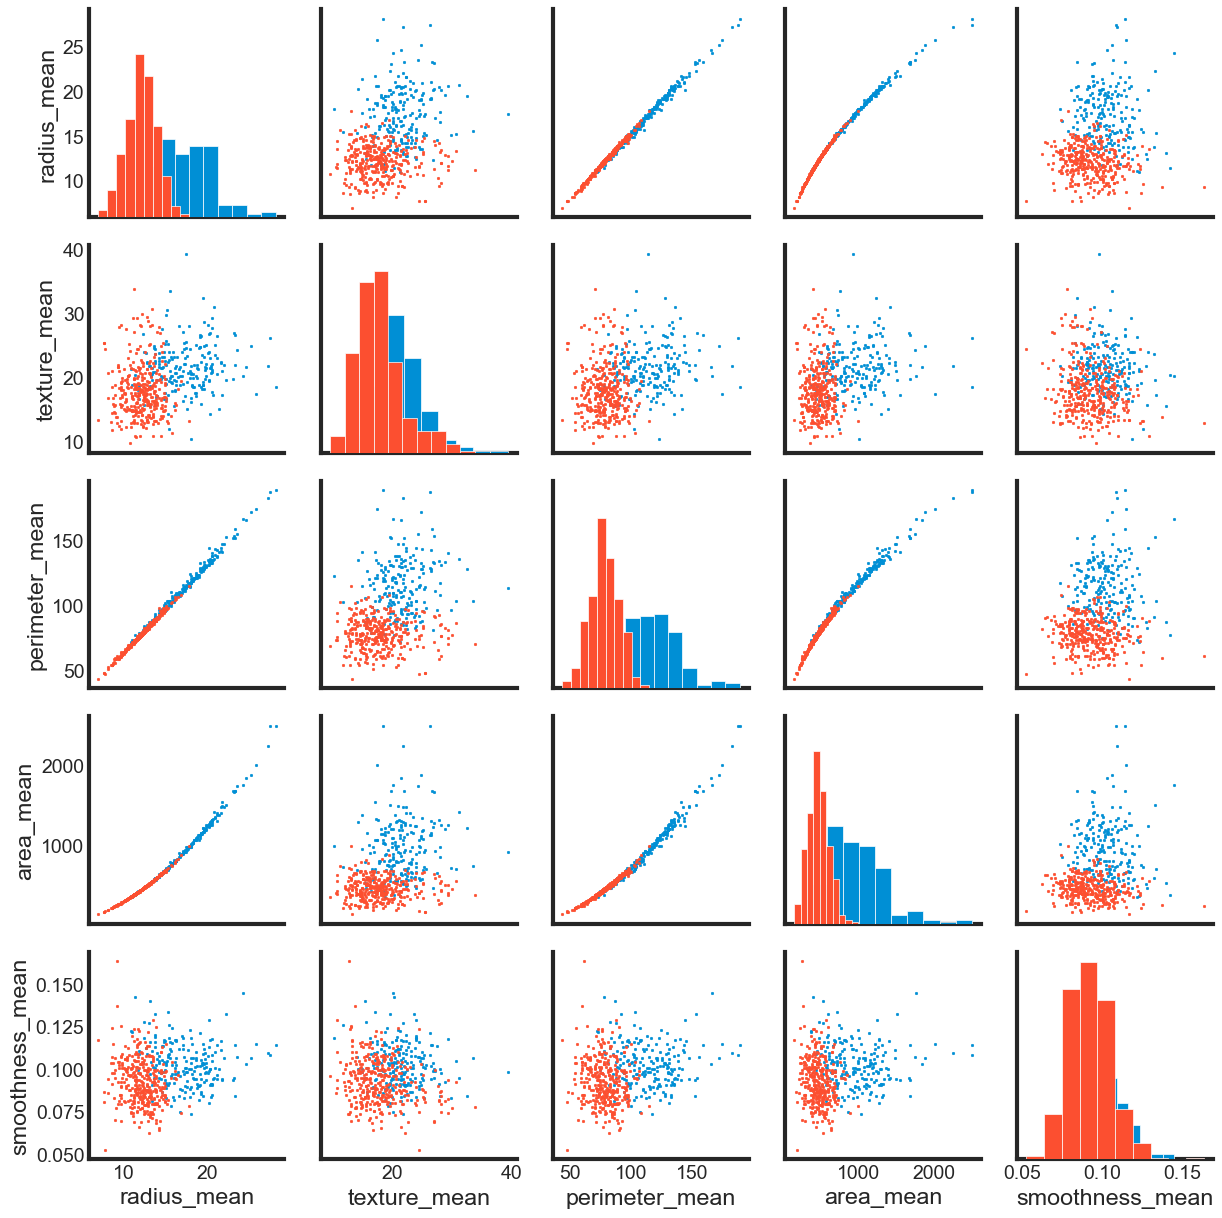

In [34]:
sns.set_style("white")

df=pd.read_csv('data/data_clean.csv', index_col=False)
g=sns.PairGrid(df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter, s=3)

#### Summary
The average measurements of cell radius, perimeter, area, compactness, concavity, and concave points hold significance in cancer classification. Elevated values in these parameters often correlate with malignant tumors.<br><br>
On the contrary, the mean values of texture, smoothness, symmetry, or fractal dimension do not exhibit a distinct preference for one diagnosis over the other.<br><br>
Furthermore, none of the histograms display prominent outliers requiring additional cleanup efforts.

## Pre-processing the data
[Data preprocessing](https://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html) plays a pivotal role in any data analysis endeavor. It's often advisable to format your data in a manner that effectively reveals the underlying structure of the problem to the machine learning algorithms you plan to utilize. This encompasses various tasks, including:

- Converting categorical data into numerical values.
- Addressing missing values.
- Standardizing the features to prevent small-scale features from dominating during model fitting.

In previous section, I delved into data exploration to gain insights into data distribution and attribute correlations. I identified key features of interest. In this notebook, I employ feature selection to trim high-dimensional data, as well as feature extraction and transformation techniques for dimensionality reduction.<br><br>
__Goal__:<br>
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

In [35]:
df=pd.read_csv('data/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Label encoding
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [36]:
array=df.values
X=array[:,1:31]
y=array[:,0]
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [37]:
# Transform the class labels form their original representation (M and B) into integers
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [38]:
# Call the transform method of LabelEncoder on two dummy variables
le.transform(['M', 'B'])

array([1, 0])

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.*
#### Assesing Model Accuracy: Split data into training and test sets
The most straightforward approach to assess the effectiveness of a machine learning algorithm involves utilizing distinct training and testing datasets. Here's what I'll do:

- Divide the available data into two sets: a training set and a testing set, typically in a 70% training and 30% testing ratio.
- Train the algorithm using the training set.
- Utilize the trained model to generate predictions on the testing set.
- Evaluate the accuracy of these predictions against the expected results.

The exact split size can vary depending on the dataset's size and characteristics, although it's common to allocate 67% of the data for training and reserve the remaining 33% for testing.


In [39]:
# Split data set in train 70% and test 30%
seed=42
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

##### Feature Standardization
Standardization, also known as feature scaling, is a valuable technique used to normalize attributes that have varying means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.<br><br>
As observed in previous section, the raw data exhibits diverse distributions, which can potentially impact the performance of many machine learning algorithms. Most machine learning and optimization algorithms tend to perform better when features are on the same scale.<br><br>
To address this, we will evaluate the same algorithms using a standardized version of the dataset. In this process, we will utilize the `sklearn library` to scale and transform the data, ensuring that each attribute has a mean value of zero and a standard deviation of one.<br><br>

In [40]:
# Normalize the data (center around 0 and scale to remove the variance)
scaler=StandardScaler()
Xs=scaler.fit_transform(X)

##### Feature decomposition using Principal Component Analysis (PCA)
Based on the pair plot analysis conducted in previous section, many feature pairs demonstrate a comparable degree of data separation. Thus, it is logical to employ dimensionality reduction methods to maximize the utilization of features while retaining as much information as possible when reducing the dataset to two dimensions. For this purpose, I will implement PCA (Principal Component Analysis).

In [41]:
# Feature extraction
pca=PCA(n_components=10)
fit=pca.fit(Xs)

In [42]:
# Summarize components
print("Explained VAriance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained VAriance: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.998

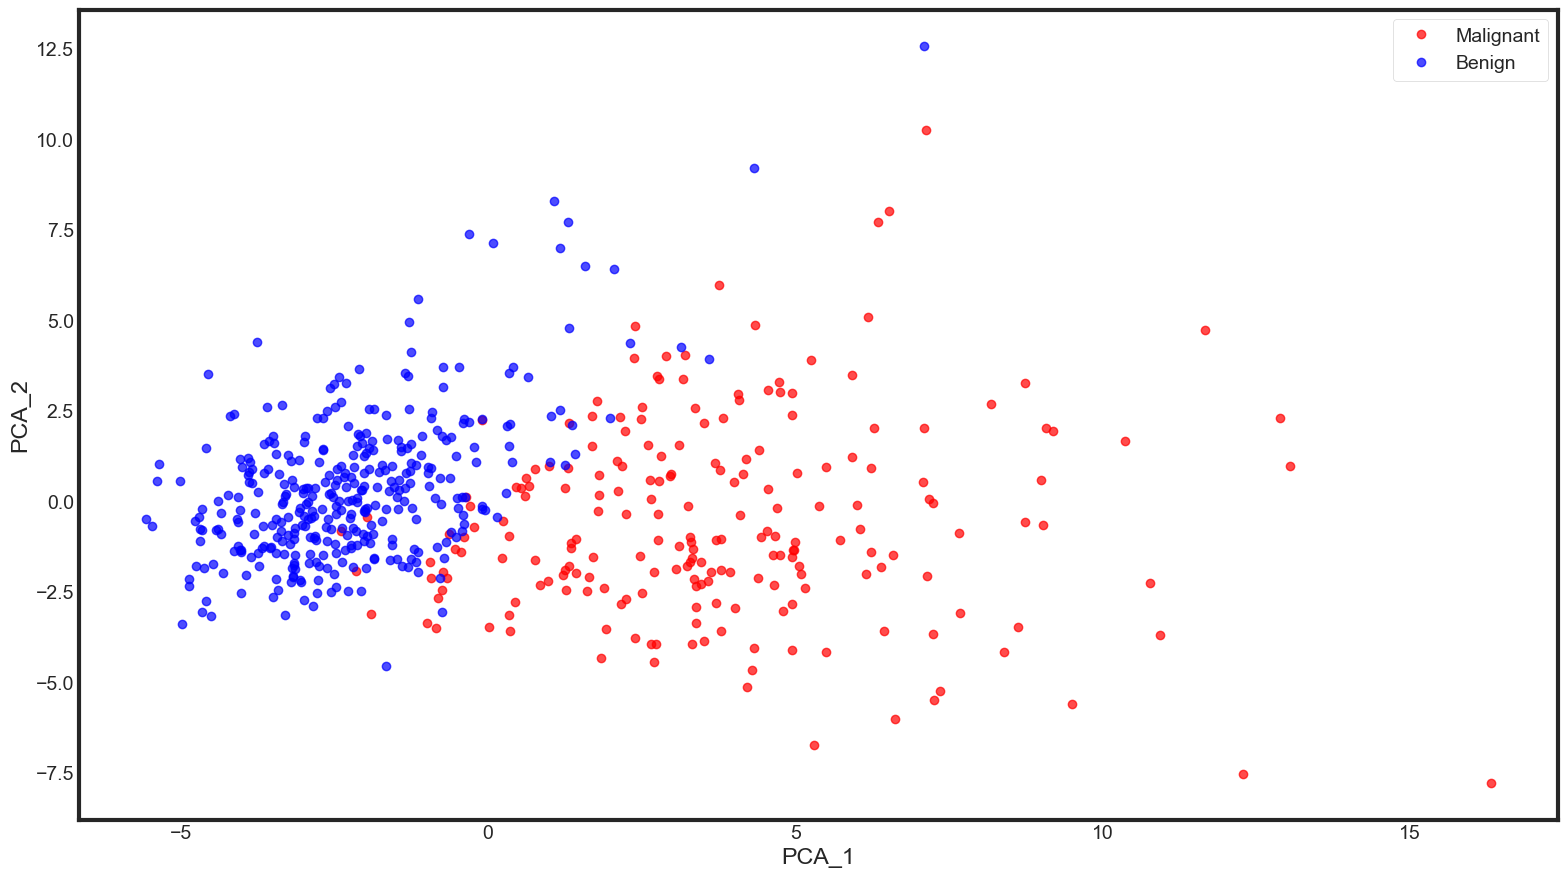

In [43]:
X_pca=pca.transform(Xs)
PCA_df=pd.DataFrame()

PCA_df['PCA_1']=X_pca[:,0]
PCA_df['PCA_2']=X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis=='M'], PCA_df['PCA_2'][df.diagnosis=='M'], 'o', alpha=0.7, color='r')
plt.plot(PCA_df['PCA_1'][df.diagnosis=='B'], PCA_df['PCA_2'][df.diagnosis=='B'], 'o', alpha=0.7, color='b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant', 'Benign'])
plt.show()


Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are __most spread__ along the new feature axes.

In [44]:
# The amount of variance that each PC explains
var=pca.explained_variance_ratio_

In [45]:
# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100)
print(var1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


##### Deciding How Many Principal Components to Retain
In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found [A Little Book of Python for Multivariate Analysis](https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html), and [PCA | What Is Principal Component Analysis & How It Works?](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/)

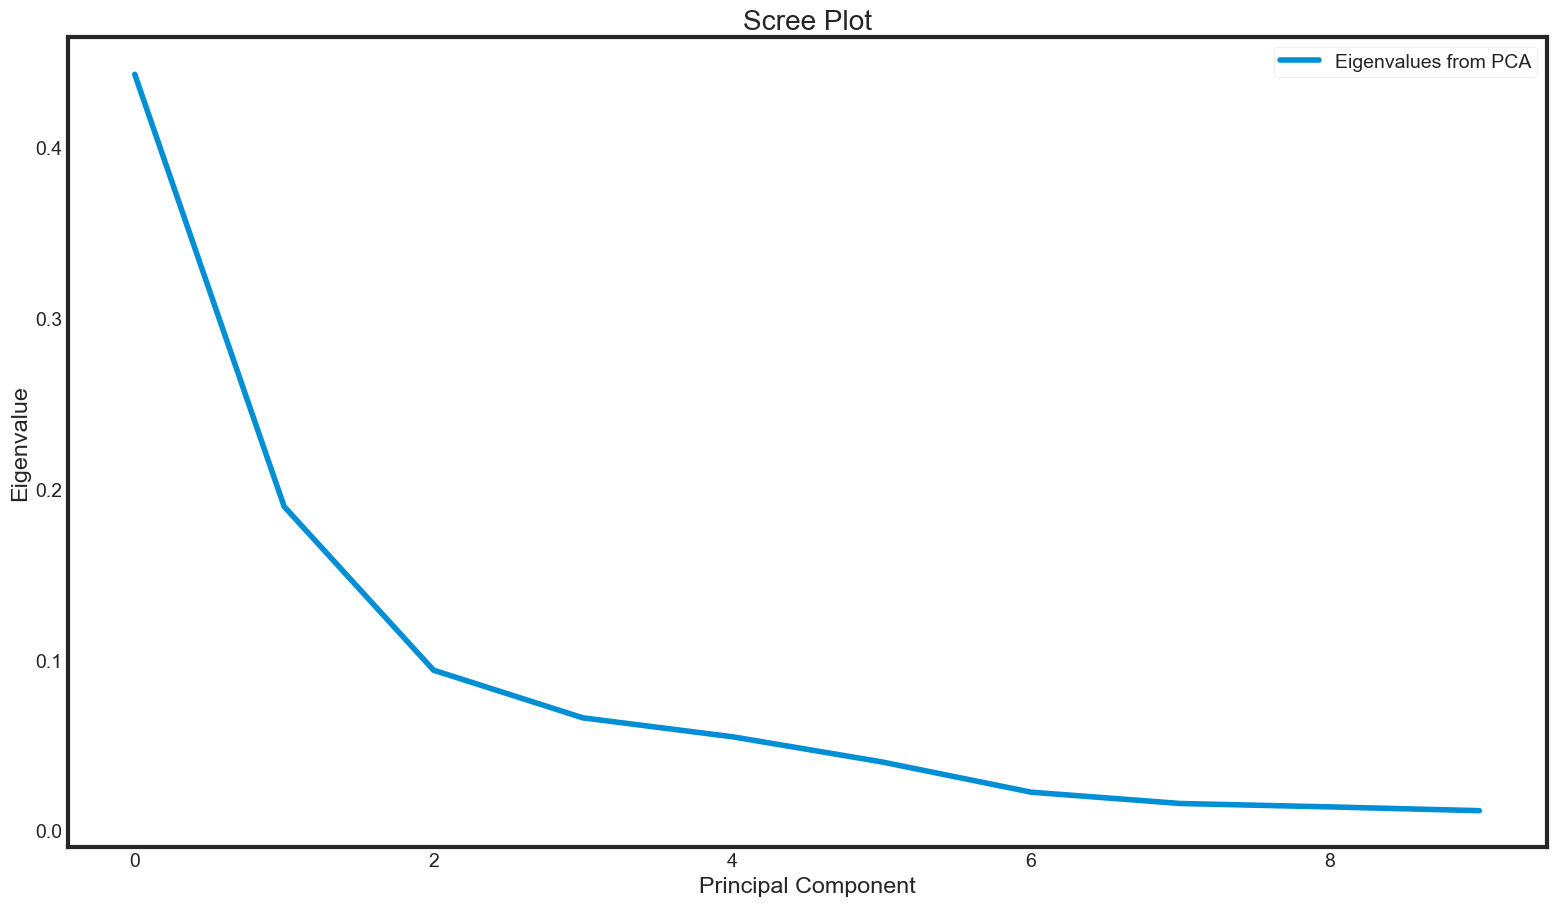

In [46]:
# The amount of variance that each PC explains
var=pca.explained_variance_ratio_

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg=plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

__Observation__
> *The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.*
##### Summary
1. Place features into a NumPy array, denoted as X, and convert class labels from their original string representation (M and B) into integers.
2. Divide the data into training and test sets.
3. Standardize the data.
4. Retrieve the Eigenvectors and Eigenvalues from either the covariance matrix or correlation matrix.
5. Arrange the eigenvalues in descending order and select the kk eigenvectors corresponding to the kk largest eigenvalues, where k represents the number of dimensions of the new feature subspace.
6. Construct the projection matrix W using the chosen k eigenvectors.
7. Transform the original dataset X using W to obtain a k-dimensional feature subspace, denoted as Y.

It is typical to choose a subset of features that exhibit the highest correlation with the class labels. The impact of feature selection should be evaluated within a comprehensive modeling pipeline to provide an unbiased estimation of the model's true performance. Therefore, in the subsequent section, you will first learn about cross-validation before implementing the PCA-based feature selection approach in the model construction pipeline.

## Predictive model using Support Vector Machine (SVM)
The predictive model will be constructed using the Support Vector Machines (SVMs) learning algorithm. SVMs are renowned for their effectiveness in classification tasks and possess a sophisticated mechanism for transforming nonlinear data into a format suitable for linear algorithms to fit a linear model to the data (Cortes and Vapnik 1995).<br><br>
Kernelized support vector machines are robust models that exhibit high performance across diverse datasets.<br><br>
SVMs offer the capability to establish complex decision boundaries, even when dealing with datasets containing only a few features.<br><br>
They excel in handling both low-dimensional and high-dimensional data, encompassing scenarios with few or many features. However, their scalability diminishes with an increase in the number of samples.<br><br>
While SVMs can deliver satisfactory results when applied to datasets with up to 10,000 samples, processing datasets exceeding 100,000 samples may pose challenges in terms of runtime and memory utilization.<br><br>
Successful application of SVMs necessitates meticulous data preprocessing and parameter tuning. Consequently, many practitioners nowadays opt for tree-based models like random forests or gradient boosting in various applications, as they require minimal or no preprocessing.<br><br>
SVM models present challenges in inspection and interpretation. Understanding the rationale behind a particular prediction can be challenging, and conveying the model's behavior to non-experts may prove difficult.<br><br>
__Key Parameters__<br>
The crucial parameters in kernel SVMs include:

+ Regularization parameter C,
+ Choice of kernel (linear, radial basis function (RBF), or polynomial),
+ Kernel-specific parameters.

Both gamma and C govern the complexity of the model, with higher values leading to increased model complexity. Hence, optimal settings for these parameters are often interrelated, and adjustments to C and gamma should be made concurrently.


In [47]:
df=pd.read_csv('data/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [48]:
#Assign predictors to a variable of ndarray (matrix) type
array=df.values
X=array[:,1:31] # features
y=array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le=LabelEncoder()
y=le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scale=StandardScaler()
Xs=scaler.fit_transform(X)

##### Classification with cross-validation
As elaborated in previous section, dividing the data into training and test sets is essential to prevent overfitting, enabling the model to generalize well to unseen real-world data. Cross-validation further refines this concept by introducing multiple folds, ensuring a comprehensive evaluation of model performance.<br><br>
The training phase involves utilizing all folds except one, which serves as the holdout sample. Following training, the fitted model's performance is assessed using the holdout sample.<br><br>
Subsequently, the holdout sample rejoins the remaining folds, and a different fold is selected as the new holdout sample. Training resumes with the remaining folds, and performance evaluation is repeated using the holdout sample. This iterative process continues until each fold has been utilized as both a test and holdout sample.<br><br>
The anticipated performance of the classifier, known as cross-validation error, is calculated as the average error rate observed across all holdout samples.<br><br>
This methodology is illustrated by initially executing a conventional train/test split, followed by the computation of cross-validation error.<br><br>

In [49]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=seed, stratify=y)

# Create an SVM classifier and train it on 70% of the data set
clf=SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample
classifier_score=clf.score(X_test, y_test)
print("\n➔The classifier accuracy score is {:03.2f}\n".format(classifier_score))


➔The classifier accuracy score is 0.96



To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [50]:
# Get overage of 3-fold cross-validation score using an SVC estimator
n_folds=3
cv_error=np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print("\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n".format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection strategy to assess the effect of using 3 features which have the best correlation with the class labels.

In [51]:
clf2=make_pipeline(SelectKBest(f_regression, k=3), SVC(probability=True))

scores=cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator
n_folds=3
cv_error=np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [52]:
print(scores)
avg=(100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("➔ Average score and uncertainty: (%.2f +/- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
➔ Average score and uncertainty: (94.20 +/- 0.496)%


Based on the preceding results, it's evident that only a subset of features is necessary to construct a model with comparable performance to models built using the entire feature set. Feature selection constitutes a crucial aspect of the model-building process, demanding careful consideration at all times. While the intricacies of feature selection are beyond the scope of this notebook, it remains an essential consideration. For the remainder of the analysis, we will continue to utilize the entire set of features.
#### Model Accuracy: Receiver Operating Characteristic (ROC) curve
In statistical modeling and machine learning, one frequently used metric to assess the accuracy of models in binary classification tasks is the Area Under the Curve (AUC).<br><br>
To comprehend the insights provided by the ROC curve, it's helpful to visualize the confusion matrix. This matrix is essentially a two-dimensional table, with the classifier model represented on one axis (vertical) and the ground truth on the other (horizontal) axis. Each axis can take on two values, as illustrated below.<br><br>
Model says "+" |Model says "-" --- | --- | --- True positive | False negative | ** Actual: "+" ** False positive | True negative | Actual: "-" In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:
> * True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
> * False positive rate:       fpr = fp / (fp + tn)
> * True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can express<br><br>
+ The true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").

In [53]:
# The confusion matrix helps visualize the preformanxe of the algorithm
y_pred=clf.fit(X_train, y_train).predict(X_test)
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[107   0]
 [  6  58]]


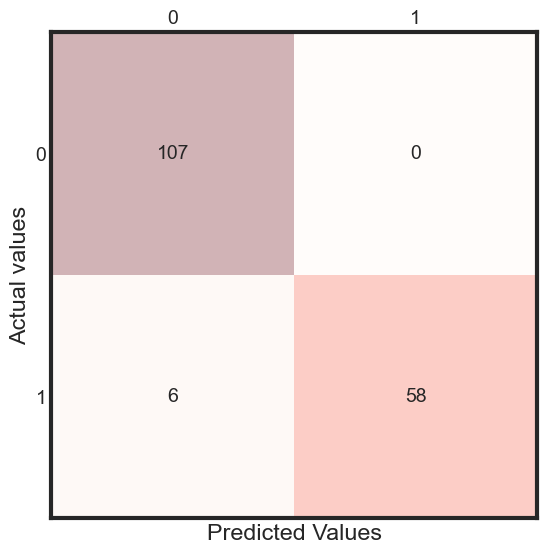

In [54]:
fig, ax=plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



Observaion
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

- The classifier made a total of 171 predictions (i.e 171 patients were being tested for the presence breast cancer).
- Out of those 171 cases, the classifier predicted "yes" 58 times, and "no" 113 times.
- In reality, 64 patients in the sample have the disease, and 107 patients do not.

Rates as computed from the confusion matrix

1. Accuracy: Overall, how often is the classifier correct?
    + (TP+TN)/total = (58+107)/171 = 0.96

2. Misclassification Rate: Overall, how often is it wrong?
    + (FP+FN)/total = (0+6)/171 = 0.03 equivalent to 1 minus Accuracy also known as "Error Rate"

3. True Positive Rate: When it's actually yes, how often does it predict 1?
    + TP/actual yes = 58/64 = 0.91 also known as "Sensitivity" or "Recall"

4. False Positive Rate: When it's actually 0, how often does it predict 1?
    + FP/actual no = 0/107 = 0.0

5. Specificity: When it's actually 0, how often does it predict 0? also know as true positive rate
    + TN/actual no = 107/107 = 1.0 equivalent to 1 minus False Positive Rate

6. Precision: When it predicts 1, how often is it correct?
    + TP/predicted yes = 58/58 = 1.0

7. Prevalence: How often does the yes condition actually occur in our sample?
    + actual yes/total = 64/171 = 0.34



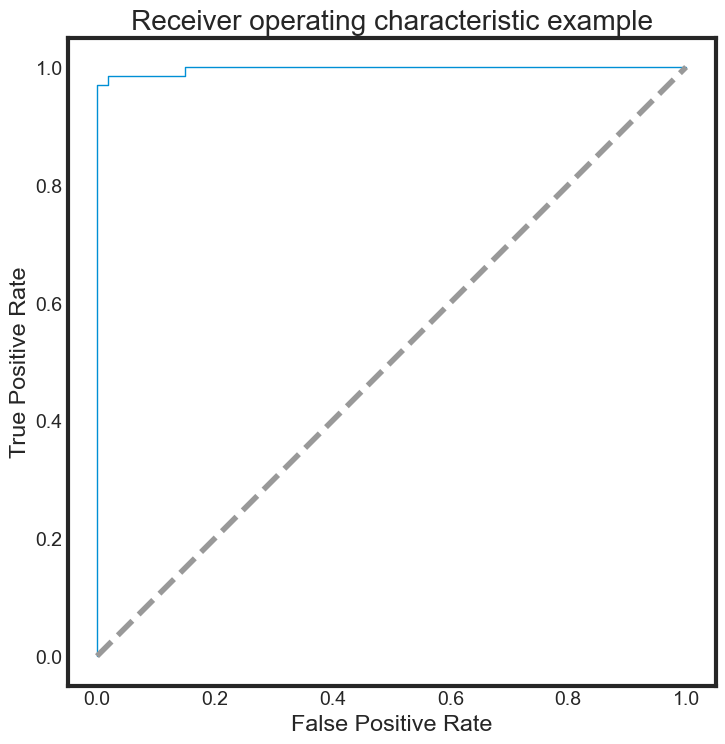

In [63]:
plt.figure(figsize=(10,8))
probas_=clf.predict_proba(X_test)
fpr, tpr, threshold= roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.axes().set_aspect(1)  # Establecer el aspecto de los ejes antes de trazar
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

* When interpreting the ROC curve accurately, it's important to understand the significance of the points lying on the diagonal. These points indicate situations where there's an equal probability of both positive and negative outcomes occurring, akin to making predictions by flipping an unbiased coin. Essentially, the classification model performs no better than random chance in these instances.

* Above the diagonal line, where true positive rate (TPR) exceeds false positive rate (FPR), the model indicates performance superior to random chance. For instance, if TPR = 0.99 and FPR = 0.01, the likelihood of correctly identifying positives is . Moreover, with FPR held constant, the closer the point lies to the top-left corner, the more effective the classification model becomes.<br><br>
__Next we'll look into optimizing the class__<br><br>
[Cortes, Corinna, and Vladimir Vapnik. 1995. 'Support-Vector Networks.' Machine Learning 20: 273. Accessed September 3, 2016. doi: 10.1023/A:1022627411411](https://link.springer.com/article/10.1007/BF00994018)
## Optimizing the SVM Classifier
Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this part, I'll aim to tune parameters of the SVM Classification model using scikit-learn.<br><br>
Build a predictive model and evaluate with cross-validation using support vector classifies (ref previous section) for details.

In [65]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)


The classifier accuracy score is 0.96


The 5-fold cross-validation accuracy score for this classifier is 0.98

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



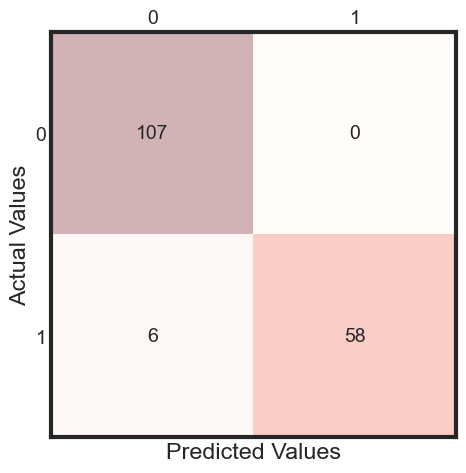

In [66]:
df=pd.read_csv('data/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Assign predictors to a variable of ndarray (matrix) type
array=df.values
X=array[:, 1:31]
y=array[:, 0]

# Transform the class labels fro mtheir original string representation (M and B) into integers
le=LabelEncoder()
y=le.fit_transform(y)

# Normalize the data (center around 0 and scale to remove the variance)
scaler=StandardScaler()
Xs=scaler.fit_transform(X)

# Feature extraction
pca=PCA(n_components=10)
fit=pca.fit(Xs)
X_pca=pca.transform(Xs)

# Divide records in training and testing sets.
seed=42
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=seed, stratify=y)

# Create an SVM classifier and train it on 70% of the data set
clf=SVC(probability=True)
clf.fit(X_train, y_train)

# Analize accuracy of predictions on 30% of the holdout test sample
classifier_score=clf.score(X_test, y_test)
print("\nThe classifier accuracy score is {:03.2f}\n".format(classifier_score))

clf2=make_pipeline(SelectKBest(f_regression, k=3), SVC(probability=True))
scores=cross_val_score(clf2, X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using on SVC estimator
n_folds=5
cv_error=np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred=clf.fit(X_train, y_train).predict(X_test)
cm=metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

fig, ax=plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##### Importance of optimizing a classifier
We can tune two key parameters of the SVM algorithm:
* the value of C (how much to relax the margin)
* and the type of kernel.

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).<br><br>
Python scikit-learn provides two simple methods for algorithm parameter tuning:<br><br>
* Grid Search Parameter Tuning.
* Random Search Parameter Tuning.

In [67]:
# Train classifiers
kernel_values=['linear', 'poly', 'rbf', 'sigmoid']
param_grid={'C':np.logspace(-3, 2, 6),
            'gamma':np.logspace(-3, 2, 6),
            'kernel':kernel_values}

grid=GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [68]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.97


In [69]:
grid.best_estimator_.probability=True
clf=grid.best_estimator_

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



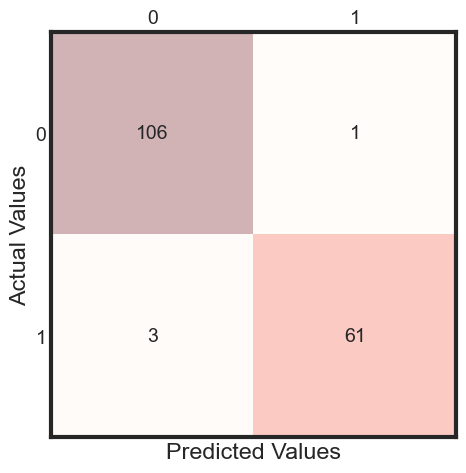

In [70]:
y_pred=clf.fit(X_train, y_train).predict(X_test)
cm=metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax=plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)

for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

##### Decision boundaries of different classifiers
Let's see the decision boundaries produced by the linear, Gaussian and polynomial classifiers

In [72]:
def decision_plot(X_train, y_train, n_neighbors, weights):
    h=0.2 # step size in the mesh

Xtrain=X_train[:, :2] # we only take the first two features

#===============================================================
# Create color maps                                           ||
#===============================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#=======================================================================
# we create an instance of SVM and fit out data.                       ||
# We do not scale ourdata since we want to plot the support vectors   ||
#======================================================================

C=1.0 # SVM regularization parameter

svm=SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc=SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc=SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [73]:
plt.rcParams['figure.figsize']=(15, 9) 
plt.rcParams['axes.titlesize']='large'

# Create a mesh to plot in
x_min, x_max=Xtrain[:, 0].min()-1, Xtrain[:, 0].max()+1
y_min, y_max=Xtrain[:, 1].min()-1, Xtrain[:, 1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Title for the plots
titles=['SVC with linear kernel',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel']

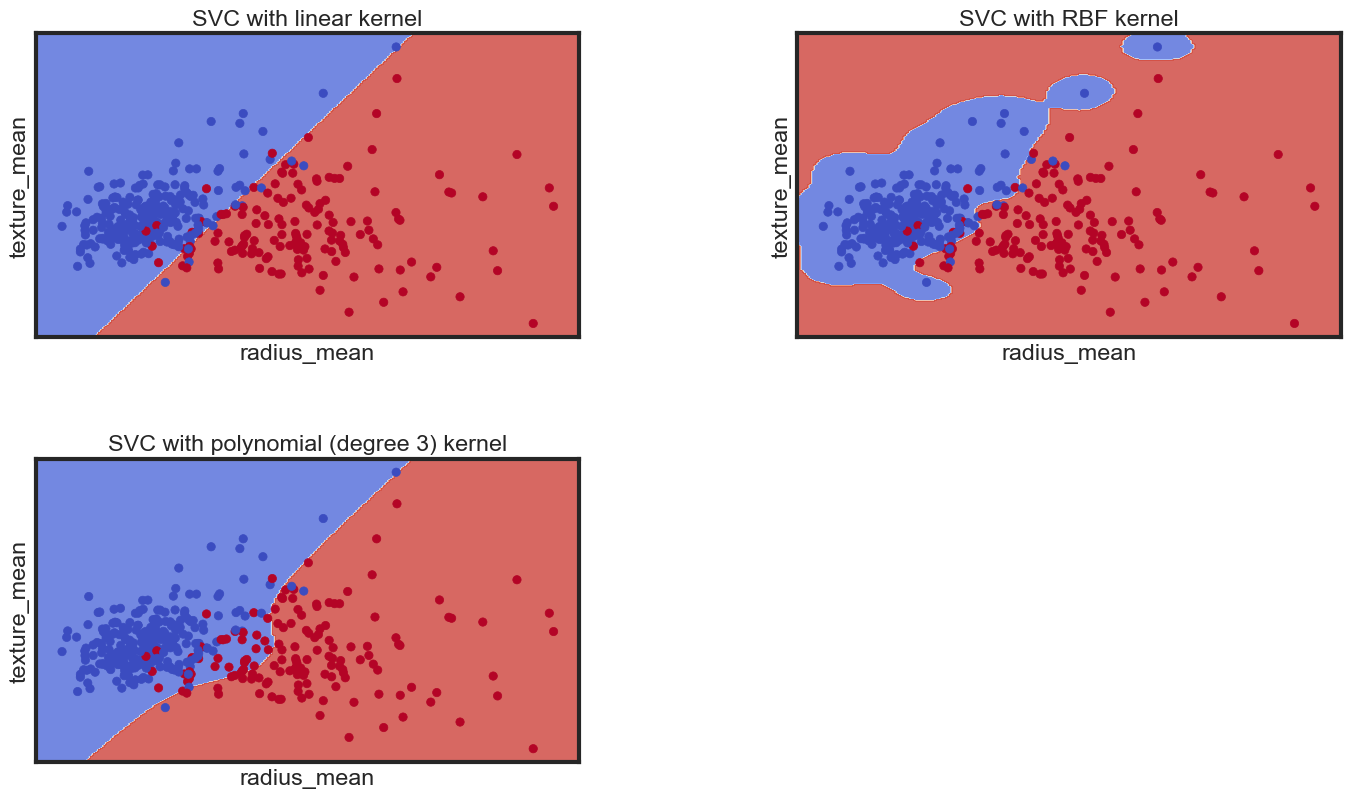

In [74]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max]
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(Xtrain[:,0], Xtrain[:,1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

##### Conclusion
This study showcases the application of Support Vector Machine (SVM) for modeling breast cancer as a classification task.<br><br>
The SVM yields improved performance when the dataset is standardized, ensuring that all attributes have a mean of zero and a standard deviation of one. This standardization process can be computed using the entire training dataset, and the same transformation can be applied to the input attributes of the validation dataset.
##### New Task:
1. Summary and conclusion of findings
2. Compare with other classification methods
    * Decision trees with `tree.DecisionTreeClassifier()`
    * K-nearest neighbors with `neighbors.KNeighborsClassifier()`
    * Random forests with `ensemble.RandomForestClassifier()`
    * Perceptron (both gradient and stochastic gradient) with `mlxtend.classifier.Perceptron`
    * Multilayer perceptron network (both gradient and stochastic gradient) `with mlxtend.classifier.MultiLayerPerceptron`


## Automate the ML process using pipelines
There are standard workflows in a machine learning project that can be automated. In Python scikit-learn, Pipelines help to clearly define and automate these workflows.
- Pipelines help overcome common problems like data leakage in your test harness.
- Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
- Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.
### Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models
4. Select the best model
### Dataset Validation


In [2]:
#load data
df=pd.read_csv('data/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Split-out validation dataset
array=df.values
X=array[:,1:31]
y=array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=7)

#transform the class labels from their original string representation (M and B) into integers
le=LabelEncoder()
y=le.fit_transform(y)

### Evaluate Algorithms: Baseline

In [3]:
# Spot-Check Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds=10
num_instances=len(X_train)
seed=42
scoring='accuracy'

results=[]
names=[]

for name, model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print("\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers")

LR: 0.942179 (0.027595)
LDA: 0.957308 (0.027497)
KNN: 0.934615 (0.037614)
CART: 0.914551 (0.030078)
NB: 0.934487 (0.028495)
SVM: 0.901923 (0.038099)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


In [4]:
len(X_train)

398

#### Observation
> *The findings indicate that both Logistic Regression and LDA could merit additional investigation. These figures represent only the average accuracy values. It's prudent to examine the spread of accuracy values calculated across cross-validation folds. This can be visualized using box and whisker plots.*

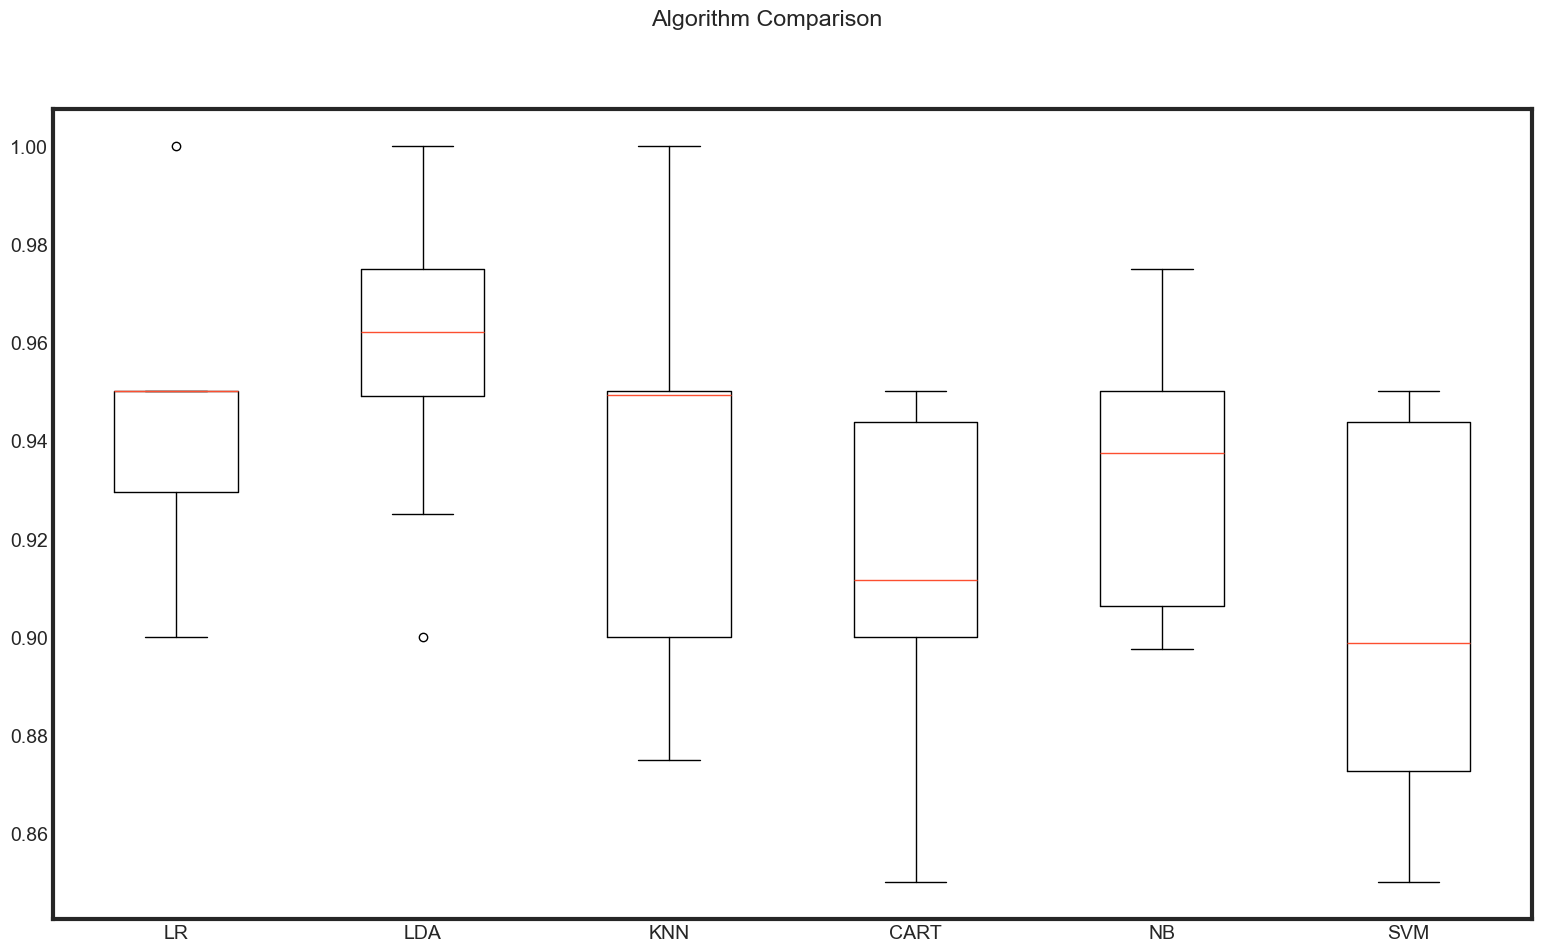

In [5]:
# Compare Algorithms
fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observation
> *The outcomes reveal a consistent and narrow spread among all classifiers, with the exception of SVM, which is promising as it indicates low variability. The favorable performance of SVM is pleasing. It's conceivable that the diverse distribution of attributes might impact the accuracy of algorithms like SVM. In the subsequent section, we'll replicate this assessment using a standardized version of the training dataset.*

### Evaluate Algorithms: Standardize Data

In [6]:
# Standardize the dataset
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results=[]
names=[]


for name, model in pipelines:  
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.972372 (0.013442)
ScaledLDA: 0.957308 (0.027497)
ScaledKNN: 0.952179 (0.030707)
ScaledCART: 0.912115 (0.016499)
ScaledNB: 0.937115 (0.032372)
ScaledSVM: 0.962244 (0.023333)


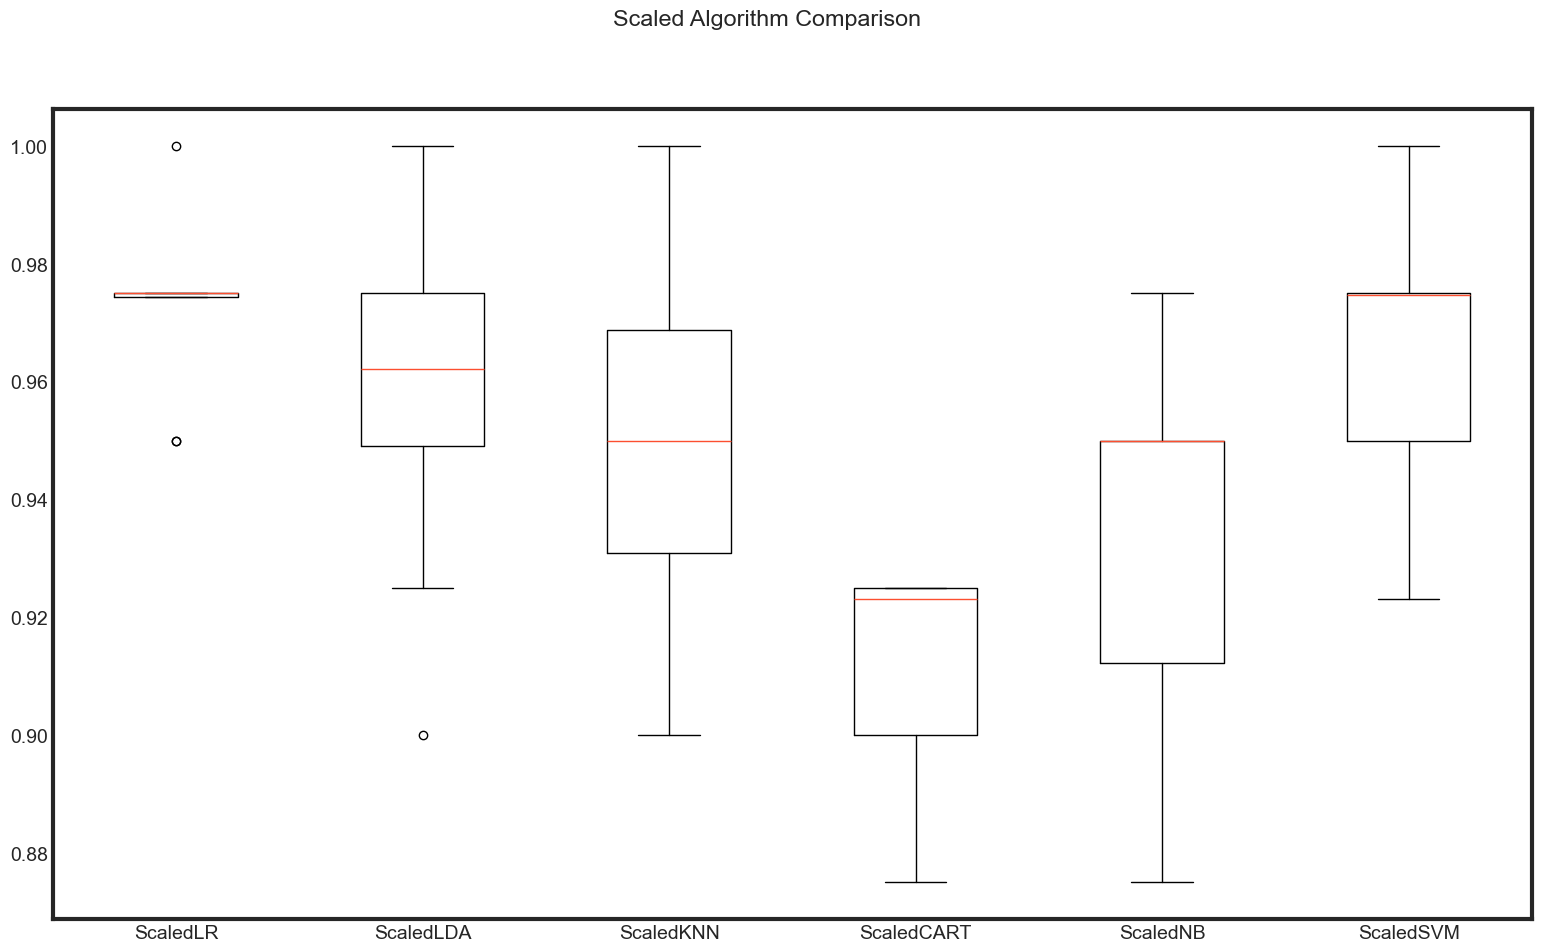

In [7]:
# Compare Algorithms

fig=plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations
> *The findings indicate that by standardizing the data, SVM has emerged as the most accurate algorithm examined thus far. This suggests a need for further exploration of SVM, as well as LDA and LR algorithms. It's highly probable that adjusting configurations beyond the default settings could lead to even more precise models.*
<br>
### Algorithm Tuning
In this section I investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, LDA and SVM.<br><br>
__Tuning hyper-parameters -> SVC estimator__

In [8]:
# Make Support Vector Classifier Pipeline
pipe_svc=Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', SVC(probability=True, verbose=False))])

# Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('➝ Fitted Pipeline to training Data')

scores=cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Tune Hyperparameters
param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid=[{'clf__C': param_range,'clf__kernel': ['linear']}, 
            {'clf__C': param_range,'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs=GridSearchCV(estimator=pipe_svc, 
                param_grid=param_grid,
                scoring='accuracy',
                cv=10, 
                n_jobs=1)
gs=gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➔ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9446794871794871
➔ Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


__Tuning the hyper-parameters: k-NN hyperparameters__<br><br>
For your standard k-NN implementation, there are two primary hyperparameters that you’ll want to tune:
- The number of neighbors k.
- The distance metric/similarity function.

Both of these factors can significantly influence the accuracy of your k-NN classifier. The grid object is prepared to conduct 10-fold cross-validation on a KNN model, utilizing classification accuracy as the evaluation metric. Additionally, there's a parameter grid to iterate through the 10-fold cross-validation process 30 times. Each iteration, the n_neighbors parameter should receive a distinct value from the provided list. We cannot simply provide `GridSearchCV` with a list; instead, we need to specify that n_neighbors should range from 1 through 30. You have the option to set `n_jobs=-1` to execute computations in parallel (if supported by your computer and operating system).

In [9]:
pipe_knn=Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', KNeighborsClassifier())])

# Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

score=cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('➝ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Tune Hyperparameters
param_range=range(1, 31)
param_grid=[{'clf__n_neighbors': param_range}]

# instantiate the grid
gs=GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs=gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➝ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9396153846153847
➔ Best Parameters: 
 {'clf__n_neighbors': 19}


### Finalize Model

In [10]:
#Use best parameters
clf_svc=gs.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores=cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

➔ Final Model Training Accuracy: 0.940 +/- 0.034
➜ Final Accuracy on Test set: 0.94737


In [11]:
clf_svc.fit(X_train, y_train)
y_pred=clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[113   3]
 [  6  49]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       116
           M       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



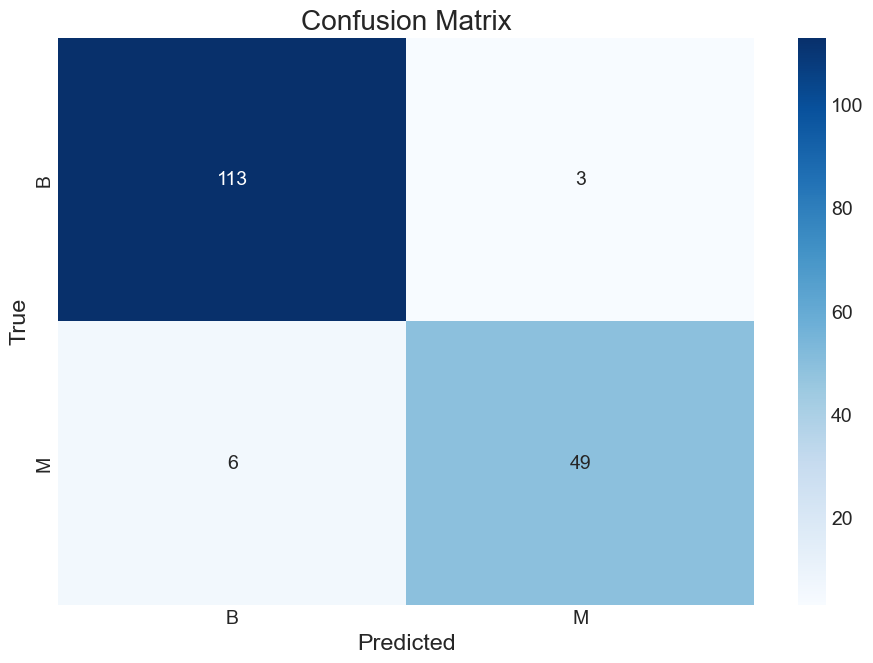

In [12]:
# Confusion matrix calculation
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_svc.classes_, yticklabels=clf_svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Summary
Successfully completed an end-to-end classification predictive modeling task utilizing Python. Specifically, the process included the following steps:
1. Problem Definition (utilizing Breast Cancer data).
2. Dataset Loading.
3. Data Analysis (observed same scale but different data distributions).
4. Algorithm Evaluation (KNN showed promising results).
5. Algorithm Evaluation with Standardization (both KNN and SVM exhibited promising performance).
6. Algorithm Tuning (K=19 was determined to be optimal for KNN, while SVM with an RBF kernel and C=100 yielded the best results).
7. Model Finalization (utilizing all training data and validating using a separate validation dataset).